# Polynomial Regression / GPUs Dataset Analysis

### Moore's law: Number of transistors in a dense integrated circuit doubles approximately every two years. 

# Table of Contents

* [1. Polynomial Regression Theory](#polynomial_regression_theory) <br>
   * [1.1. Types of linear regression](#types_of_regression) <br>
   * [1.2. Estimating the polynomial coefficients](#estimating_the_polynomial_coefficients) <br>
<br>
* [2. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [2.1. Dataset import](#dataset_import) <br>
   * [2.2. Let's summarize the Dataset](#lets_summarize_the_dataset) <br>

## 1. Polynomial Regression Theory
<a id="polynomial_regression_theory"></a>

### 1.1. Types of linear regression
<a id="types_of_regression"></a>

* <b>Simple linear regression</b>  - the very simplest case of a single scalar predictor variable $x$ and a single scalar response variable $\hat{y}$, where $\varepsilon$ is unobserved random error. This type of regression is described by following 
equation:<br>

$$\hat{y}=\beta_{0}+\beta_{1}x+\varepsilon$$

<br>

* <b>Multiple linear regression</b> (Multivariable linear regression) - in this model predictor variable $x$ is extended into vector predictor $\mathbf {X}$. Note, however, that in these cases the response variable $\hat{y}$ is still a scalar. 

$$\hat{y}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}+\varepsilon$$

<br>

* <b>Polynomial linear regression</b> - this model is linear, because the regression function is linear in terms of the unknown parameters $\beta_{0}, \beta_{1}, ...$. Variables $x, x^{2}, ...$ are treated as being distinct independent variables in a multiple regression model.

$$\hat{y}=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{1}^{2}+...+\beta_{n}x_{1}^{n}+\varepsilon$$

### 1.2. Estimating the polynomial coefficients
<a id="estimating_the_polynomial_coefficients"></a>

The polynomial regression model: 

${\displaystyle \hat{y_{i}}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}x_{i}^{2}+\cdots +\beta _{m}x_{i}^{m}+\varepsilon _{i}\ (i=1,2,\dots ,n)}$

can be expressed in matrix form as: 

$\displaystyle {\vec {y}}=\mathbf {X} {\vec {\beta }}+{\vec {\varepsilon }}$

Where:
* $\mathbf {X}$ - design matrix
* $\vec {y}$ -  response vector
* $\vec {\beta }$ - parameter vector
* $\vec {\varepsilon }$ -  vector of random errors

Then the model can be written as a system of linear equations:

$${\begin{bmatrix}y_{1}\\y_{2}\\y_{3}\\\vdots \\y_{n}\end{bmatrix}}={\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{m}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{m}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{m}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{n}&x_{n}^{2}&\dots &x_{n}^{m}\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{m}\end{bmatrix}}+{\begin{bmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\varepsilon _{3}\\\vdots \\\varepsilon _{n}\end{bmatrix}}$$



## 2. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 2.1. Dataset import
<a id="dataset_import"></a>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Let's import dataset from csv file
dataset = pd.read_csv('../../00_Datasets/GPUs/All_GPUs.csv')

### 2.2. Let's try to summarize the Dataset
<a id="lets_summarize_the_dataset"></a>

In [18]:
dataset.head()

,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,...,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
0,Tesla G92b,NaN,NaN,738 MHz,2.0,Yes,DX 10.0,NaN,0.0,No,...,55nm,16,\n01-Mar-2009,NaN,2560x1600,Yes,4.0,64.0,47 GTexel/s,0.0
1,R600 XT,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n14-May-2007,NaN,2560x1600,Yes,4.0,16.0,12 GTexel/s,0.0
2,R600 PRO,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n07-Dec-2007,NaN,2560x1600,Yes,4.0,16.0,10 GTexel/s,0.0
3,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n01-Jul-2007,NaN,2560x1600,Yes,4.0,8.0,7 GTexel/s,0.0
4,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n28-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 34 columns):
Architecture              3344 non-null object
Best_Resolution           2764 non-null object
Boost_Clock               1446 non-null object
Core_Speed                3406 non-null object
DVI_Connection            2656 non-null float64
Dedicated                 3392 non-null object
Direct_X                  3400 non-null object
DisplayPort_Connection    857 non-null float64
HDMI_Connection           2643 non-null float64
Integrated                3392 non-null object
L2_Cache                  3406 non-null object
Manufacturer              3406 non-null object
Max_Power                 2781 non-null object
Memory                    2986 non-null object
Memory_Bandwidth          3285 non-null object
Memory_Bus                3344 non-null object
Memory_Speed              3301 non-null object
Memory_Type               3350 non-null object
Name                      3406 non-null objec

<b> NOTE: </b> Right away we see that we have lots of undefined values. Let's use "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset.

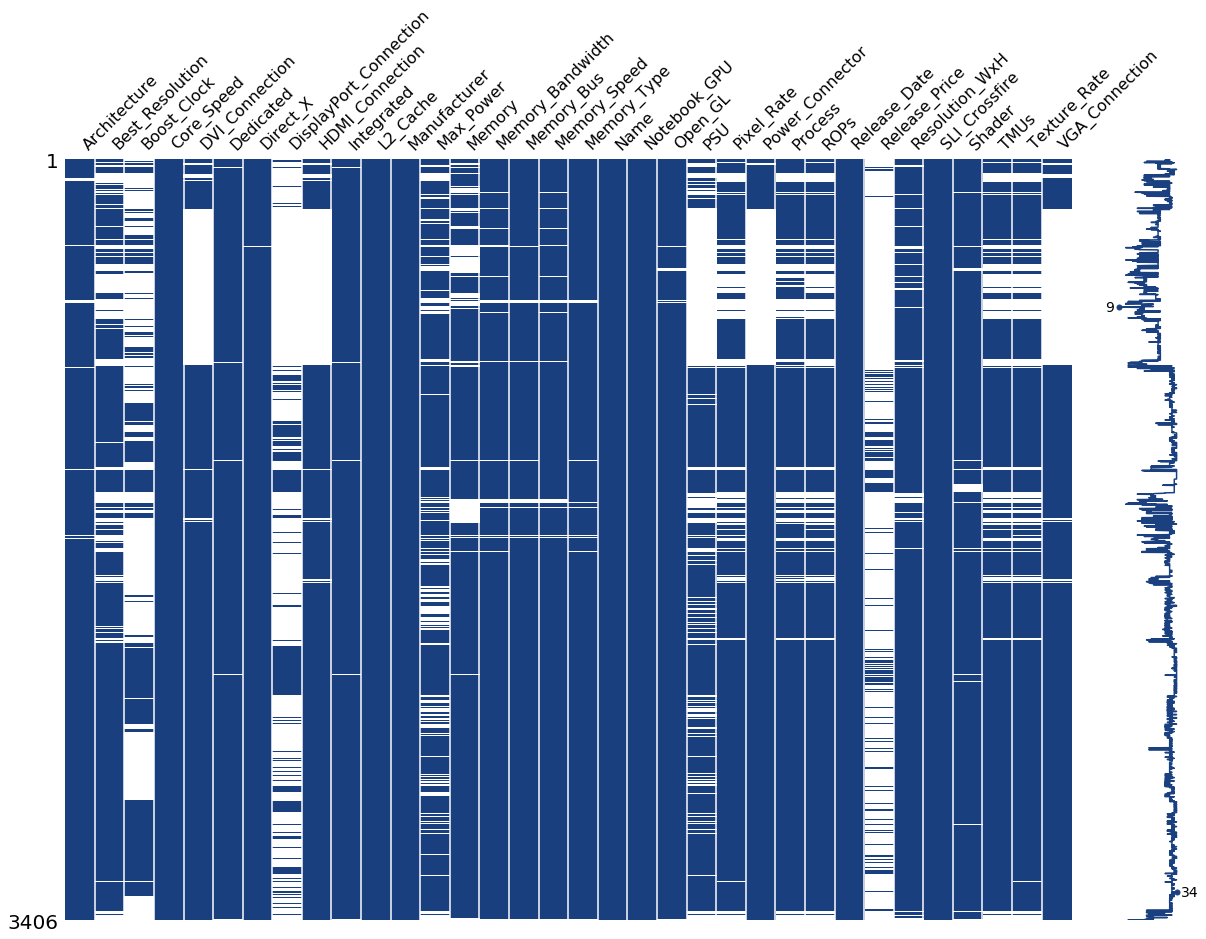

In [15]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=dataset, figsize=(20, 14), color=(0.1, 0.25, 0.5))

1. Moore's law: https://en.wikipedia.org/wiki/Moore%27s_law
2. "Missingno" GitHub repository: https://github.com/ResidentMario/missingno
3. Polynomial regression theory: https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/